In [2]:
import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv(
    "../data/ml_ready_dataset_clean.csv",
    parse_dates=["from_date"]
)

df = df.sort_values("from_date").reset_index(drop=True)

print("Dataset shape:", df.shape)


Dataset shape: (21180, 26)


In [4]:
TARGET = "PM2.5"

DROP_COLS = [
    "from_date",
    "station_id"
]

X = df.drop(columns=DROP_COLS + [TARGET])
y = df[TARGET]


In [5]:
split_idx = int(0.8 * len(df))

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]


In [5]:
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)


In [6]:
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [7]:
y_pred_xgb = xgb_model.predict(X_test)


In [8]:
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("📊 XGBoost Model Performance")
print("MAE :", round(mae, 3))
print("RMSE:", round(rmse, 3))
print("R²  :", round(r2, 4))


📊 XGBoost Model Performance
MAE : 3.672
RMSE: 5.622
R²  : 0.8502


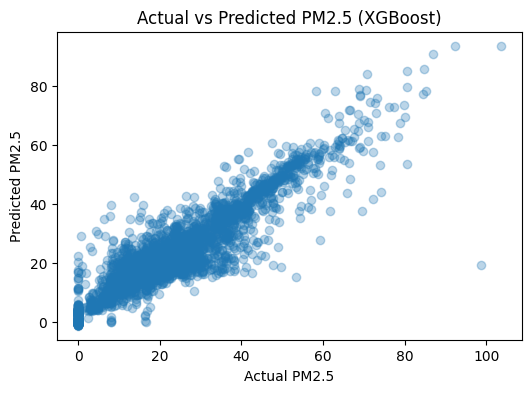

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5 (XGBoost)")
plt.show()


In [10]:
import joblib

joblib.dump(xgb_model, "../models/pm25_xgb_model.pkl")

print("✅ XGBoost model saved")


✅ XGBoost model saved


In [11]:
comparison = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "MAE": [3.52, mae],      # replace 3.52 with your RF MAE
    "RMSE": [5.69, rmse],    # replace with your RF RMSE
    "R2": [0.847, r2]        # replace with your RF R2
})

comparison


,Model,MAE,RMSE,R2
0,Random Forest,3.52000,5.690000,0.84700
1,XGBoost,3.67155,5.621702,0.85017


In [9]:
import joblib

FEATURE_COLUMNS = list(X_train.columns)

joblib.dump(FEATURE_COLUMNS, "../backend/models/feature_columns.pkl")


['../backend/models/feature_columns.pkl']